In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Roman Urdu DataSet.csv')

# Get Shape of Data:

In [3]:
df.shape

(11224, 3)

In [4]:
df.describe()

,review,sentiment,Unnamed: 2
count,11224,11224,4
unique,11021,4,4
top,Good,Positive,till here
freq,23,5959,1


# Show First 15 Rows:

In [5]:
df.head(15)


,review,sentiment,Unnamed: 2
0,Aala taleem ke liye Cambridge gae to angrezi s...,Positive,NaN
1,Lekin is tarha ke kitne waqeaat honge jo manza...,Positive,NaN
2,Question: Guzishta arse Deal Stain ne musalsal...,Negative,NaN
3,Retire hone ka bawajud cricket se Javed Miand...,Positive,NaN
4,ab ham Nadeem key nam se jantey haien to keya ...,Positive,NaN
5,Wo muqaddar ka sikander… Janemann kehlaega…,Positive,NaN
6,Abdul Bari uss waqt ke behtareen khelari mane ...,Positive,NaN
7,Aftab jawed British Amateur o Champion ship je...,Positive,NaN
8,Air marshal Noor khan ko Pakistan cricket boar...,Positive,NaN
9,Akhri 26 over mein Pakistan ko 164 runs ki zar...,Negative,NaN


# Show Last 15 Rows:

In [6]:
df.tail(15)

,review,sentiment,Unnamed: 2
11209,Zindagi Ka Har Din Aakhri Samjho,Positive,NaN
11210,Zindagi ke akhiri 10 saalon mein wo ziyadah ta...,Negative,NaN
11211,Zindagi Ko Badalne Me Waqt Nahi Lagta,Positive,NaN
11212,Zindagi se mayos marizon ko wo apne idare mein...,Positive,NaN
11213,Zobaria kitni sweet nature ki hai.,Positive,NaN
11214,zobi ka akela chora chahiya tha ta k us ko ehs...,Negative,NaN
11215,Zoog ki 4G Diwais 2G ha.,Negative,NaN
11216,zoya ki acting osam hy Allah mujy b zoya jysi ...,Positive,NaN
11217,Zubi bhai choro agar hum market main aagy to b...,Negative,NaN
11218,Zulfiqar Ali Bhutto bohot achchay moqarir thay...,Positive,NaN


# Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11224 entries, 0 to 11223
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   review      11224 non-null  object
 1   sentiment   11224 non-null  object
 2   Unnamed: 2  4 non-null      object
dtypes: object(3)
memory usage: 263.2+ KB


In [8]:
# missing values
df.isnull().sum()


review            0
sentiment         0
Unnamed: 2    11220
dtype: int64

In [9]:
# check for duplicate values
df.duplicated().sum()

200

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

# removing extra column

In [12]:
df.drop(columns=['Unnamed: 2'], inplace=True)

In [13]:
df

,review,sentiment
0,Aala taleem ke liye Cambridge gae to angrezi s...,Positive
1,Lekin is tarha ke kitne waqeaat honge jo manza...,Positive
2,Question: Guzishta arse Deal Stain ne musalsal...,Negative
3,Retire hone ka bawajud cricket se Javed Miand...,Positive
4,ab ham Nadeem key nam se jantey haien to keya ...,Positive
...,...,...
11219,Zulfiqar Ali Bhutto ki shakhsiyat agarcha un k...,Negative
11220,Zulfiqar Ali Bhutto ki shakhsiyat atni bhar pu...,Positive
11221,Zulm sirf America main hi nhn....,Negative
11222,Zunair Khawaja Apki Izat Majroh krna Nai.Chaht...,Negative


In [14]:
df['sentiment'].value_counts()

sentiment
Positive    5801
Negative    5207
Neutral       15
Neative        1
Name: count, dtype: int64

In [15]:
# Drop rows where 'sentiment' is either 'Neative' or 'Neutral'
df.drop(df[(df['sentiment'] == 'Neative') | (df['sentiment'] == 'Neutral')].index, inplace=True)

In [16]:
df['sentiment'].value_counts()

sentiment
Positive    5801
Negative    5207
Name: count, dtype: int64

In [17]:
df['sentiment'].value_counts()

sentiment
Positive    5801
Negative    5207
Name: count, dtype: int64

In [18]:
df.shape

(11008, 2)

# EDA(Exploratory Data Analysis)

In [19]:
df.head(5)

,review,sentiment
0,Aala taleem ke liye Cambridge gae to angrezi s...,Positive
1,Lekin is tarha ke kitne waqeaat honge jo manza...,Positive
2,Question: Guzishta arse Deal Stain ne musalsal...,Negative
3,Retire hone ka bawajud cricket se Javed Miand...,Positive
4,ab ham Nadeem key nam se jantey haien to keya ...,Positive


In [20]:
df.sample(10)

,review,sentiment
7633,Me Tanha Aur Tanha Aur Tahna Hota Ja Raha Hoon,Negative
8612,pata hai isliye keh raha hn band kar de sab ko,Negative
473,Jo unhe art film ke liye mauzoo banata tha,Positive
388,Iss liye in ko Miandad ka sath le kar kamiyab...,Positive
486,Kausar Niazi… bunyadi taur par mazhabi class ...,Negative
4568,"Great work, amazingly done and great message :...",Positive
3252,bht allaw yr,Positive
7735,Mere liay 'shohar aur bachon k liay iman aur s...,Positive
3164,BHAI mere leay Seht ki dua kejeay,Positive
2009,Allah kashmir ko jabiron sy nijat dilay,Positive


In [21]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [22]:
df['sentiment'] = encoder.fit_transform(df['sentiment'])

In [23]:
df.sample(5)

,review,sentiment
866,"""Allah Kare zore sukhan or bhi zyada"".",1
2192,Allah salamat rakhy. Ameen.,1
6790,Kuch parhti to nazar ata na,0
6993,Lannat in dono bhen bhai par,0
6049,Janab Ibn-e-Safi bilashuba Urdu ke sab se barh...,1


In [24]:
df['sentiment'].value_counts()

sentiment
1    5801
0    5207
Name: count, dtype: int64

In [25]:
df.head(5)

,review,sentiment
0,Aala taleem ke liye Cambridge gae to angrezi s...,1
1,Lekin is tarha ke kitne waqeaat honge jo manza...,1
2,Question: Guzishta arse Deal Stain ne musalsal...,0
3,Retire hone ka bawajud cricket se Javed Miand...,1
4,ab ham Nadeem key nam se jantey haien to keya ...,1


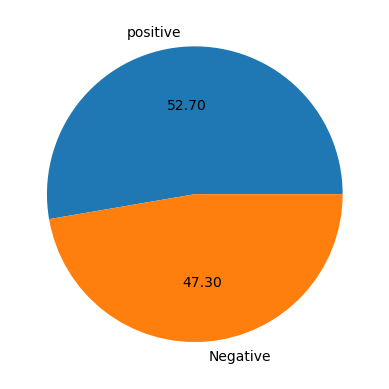

In [26]:
import matplotlib.pyplot as plt
plt.pie(df['sentiment'].value_counts(), labels=['positive', 'Negative'], autopct='%0.2f')
plt.show()

In [27]:
# Data is Balanced

In [28]:
!pip  install nltk
import nltk

Defaulting to user installation because normal site-packages is not writeable


In [29]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\D\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
df['num_char']=df['review'].apply(len)

In [31]:
df.head()

,review,sentiment,num_char
0,Aala taleem ke liye Cambridge gae to angrezi s...,1,115
1,Lekin is tarha ke kitne waqeaat honge jo manza...,1,151
2,Question: Guzishta arse Deal Stain ne musalsal...,0,103
3,Retire hone ka bawajud cricket se Javed Miand...,1,217
4,ab ham Nadeem key nam se jantey haien to keya ...,1,489


In [32]:
# num of words
df['num_word']=df['review'].apply(lambda x:len( nltk.word_tokenize(x)))

In [33]:
df.head(5)

,review,sentiment,num_char,num_word
0,Aala taleem ke liye Cambridge gae to angrezi s...,1,115,21
1,Lekin is tarha ke kitne waqeaat honge jo manza...,1,151,26
2,Question: Guzishta arse Deal Stain ne musalsal...,0,103,22
3,Retire hone ka bawajud cricket se Javed Miand...,1,217,40
4,ab ham Nadeem key nam se jantey haien to keya ...,1,489,91


In [34]:
df['num_sent']=df['review'].apply(lambda x:len( nltk.sent_tokenize(x)))

In [35]:
df.head(5)

,review,sentiment,num_char,num_word,num_sent
0,Aala taleem ke liye Cambridge gae to angrezi s...,1,115,21,1
1,Lekin is tarha ke kitne waqeaat honge jo manza...,1,151,26,1
2,Question: Guzishta arse Deal Stain ne musalsal...,0,103,22,1
3,Retire hone ka bawajud cricket se Javed Miand...,1,217,40,1
4,ab ham Nadeem key nam se jantey haien to keya ...,1,489,91,1


In [36]:
df[['num_char','num_word', 'num_sent']].describe()

,num_char,num_word,num_sent
count,11008.000000,11008.000000,11008.000000
mean,81.109829,16.460938,1.099201
std,79.656796,15.803489,0.475403
min,2.000000,1.000000,1.000000
25%,34.000000,7.000000,1.000000
50%,58.000000,12.000000,1.000000
75%,103.000000,21.000000,1.000000
max,2017.000000,340.000000,13.000000


In [37]:
# this on Nagetive msg
df[df['sentiment']==0][['num_char','num_word', 'num_sent']].describe()

,num_char,num_word,num_sent
count,5207.000000,5207.000000,5207.000000
mean,77.625312,16.014404,1.114845
std,77.956503,15.440030,0.500734
min,2.000000,1.000000,1.000000
25%,34.000000,7.000000,1.000000
50%,56.000000,12.000000,1.000000
75%,96.000000,19.000000,1.000000
max,2017.000000,340.000000,10.000000


In [38]:
#this for positive msg
df[df['sentiment']==1][['num_char','num_word', 'num_sent']].describe()

,num_char,num_word,num_sent
count,5801.000000,5801.000000,5801.000000
mean,84.237545,16.861748,1.085158
std,81.031829,16.113547,0.451039
min,3.000000,1.000000,1.000000
25%,34.000000,7.000000,1.000000
50%,61.000000,12.000000,1.000000
75%,109.000000,21.000000,1.000000
max,1431.000000,316.000000,13.000000


In [39]:
import seaborn as sns

In [40]:
df_corr= df[['sentiment','num_char', 'num_word','num_sent']]

<Axes: >

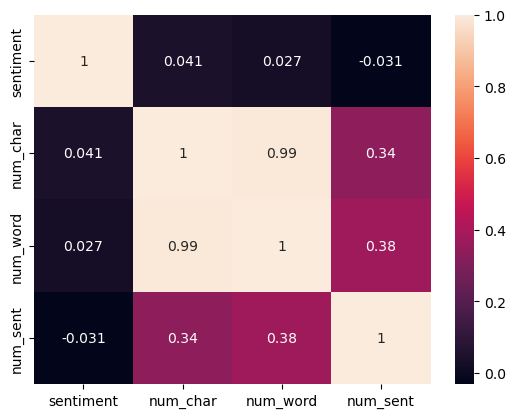

In [41]:
sns.heatmap(df_corr.corr(),annot=True)

# 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [42]:
##Tokenization: Breaking down text into words or sentences.
from nltk.tokenize import word_tokenize
import string
import re
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\D\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [43]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    
    for i in text:
       
        urdu_stopwords = ["kia","me","jis","ap","un","o","e","he","ha","h","k","b","mein", "aur", "ko", "hai", "ki", "ka", "ke", "se", "ho", "to", "ne", "kar",
                      "kya", "ye", "hota", "hoti", "kiya", "hu", "hum", "tum", "aap", "wagera", "is",
                      "are", "am", "will", "the", "of", "and", "in", "for", "on", "with", "at", "by",
                      "an", "or", "but", "not", "that", "this", "it", "from", "to", "as", "was", "were", "be", "been", 'ab', "being"
                      "ai", "ayi", "hy", "hai", "main", "ki", "tha", "koi", "ko", "sy", "woh",
                      "bhi", "aur", "wo", "yeh", "rha", "hota", "ho", "ga", "ka", "le", "lye",
                      "kr", "kar", "lye", "liye", "hotay", "waisay", "gya", "gaya", "kch", "ab",
                      "thy", "thay", "houn", "hain", "han", "to", "is", "hi", "jo", "kya", "thi",
                      "se", "pe", "phr", "wala", "waisay", "us", "na", "ny", "hun", "rha", "raha",
                      "ja", "rahay", "abi", "uski", "ne", "haan", "acha", "nai", "sent", "photo",
                      "you", "kafi", "gai", "rhy", "kuch", "jata", "aye", "ya", "dono", "hoa",
                      "aese", "de", "wohi", "jati", "jb", "krta", "lg", "rahi", "hui", "karna",
                      "krna", "gi", "hova", "yehi", "jana", "jye", "chal", "mil", "tu", "hum",
                      "par", "hay", "kis", "sb", "gy", "dain", "krny", "tou"
                     ]
    
        if i not in urdu_stopwords and i not in string.punctuation:
            y.append(i)
    
    return " ".join(y)


In [44]:
df['transformed_comment']=df['review'].apply(transform_text)

In [45]:
df.sample(5)

,review,sentiment,num_char,num_word,num_sent,transformed_comment
3730,chor tujhe unki nazar mn girana nhi chahti 😉,1,44,9,1,chor tujhe unki nazar mn girana nhi chahti
9205,safa mamala garam hai boss,0,26,5,1,safa mamala garam boss
73,Aik taraf in ke siyasi pirokaron ki tadad lak...,1,128,25,1,aik taraf siyasi pirokaron tadad lakhon dosri ...
9252,Salam pero morshad mola hosh rakhy,1,34,6,1,salam pero morshad mola hosh rakhy
1366,aap sarkon pe reh ke khush hu..,0,31,8,1,sarkon reh khush


In [46]:
df.shape

(11008, 6)

In [47]:
df['review'][7868]

'miss those midnight snacks 😄'

In [48]:
import re

def remove_emojis(text):
    # Define a regular expression pattern to match emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    # Remove emojis from the text using the pattern
    return emoji_pattern.sub(r'', text)

 # Output: 'I love Python! '
    


In [49]:
remove_emojis('miss those midnight snacks 😄')

'miss those midnight snacks '

In [50]:
df['transformed_comment']=df['transformed_comment'].apply(remove_emojis)

In [51]:
df.sample(5)

,review,sentiment,num_char,num_word,num_sent,transformed_comment
949,1 Raham 2 karam 3 Dua,1,22,6,1,1 raham 2 karam 3 dua
5158,hijab style,1,11,2,1,hijab style
1587,Ae ishaq apny zulam dekh meri umar dekh,0,40,8,1,ae ishaq apny zulam dekh meri umar dekh
46,Ab maine apni zindagi deeni aur falahi kamon ...,0,68,14,1,maine apni zindagi deeni falahi kamon waqf di
4829,Hahahaha😊😊😊😊😊,0,13,1,1,


In [52]:
df.sample(5)

,review,sentiment,num_char,num_word,num_sent,transformed_comment
12,Aor pher woh ghari agae is ka sab ko intezar t...,1,248,49,1,aor pher ghari agae sab intezar london lance d...
1175,24 Kart Pr Tola 44700 Rupe Ka Hogia Mazeed Kam...,1,58,12,1,24 kart pr tola 44700 rupe hogia mazeed kami i...
6477,khabasat ka level check kro 👅,0,29,6,1,khabasat level check kro
11185,Zban Ko lagam Do Wrna asi chotroi ho gi k 7 ph...,0,78,17,1,zban lagam do wrna asi chotroi 7 phustain yaad...
9205,safa mamala garam hai boss,0,26,5,1,safa mamala garam boss


In [53]:
df['transformed_comment'][9443]

'shayad iss waheed murad zati kahani aik mokammal kamyab almeay kay tamam anasir khud samoye huye'

In [54]:
df.shape


(11008, 6)

In [55]:
df.isnull().sum()

review                 0
sentiment              0
num_char               0
num_word               0
num_sent               0
transformed_comment    0
dtype: int64

In [56]:
df.duplicated().sum()

0

In [57]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height=500, min_font_size=10, background_color='white')

In [58]:
positive=wc.generate(df[df['sentiment']==1]['transformed_comment'].str.cat(sep=' '))

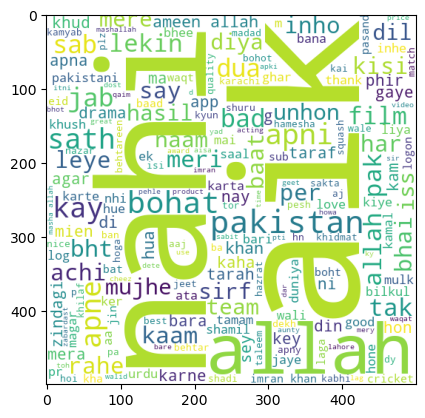

In [59]:
plt.imshow(positive)

In [60]:
nagetive=wc.generate(df[df['sentiment']==0]['transformed_comment'].str.cat(sep=' '))

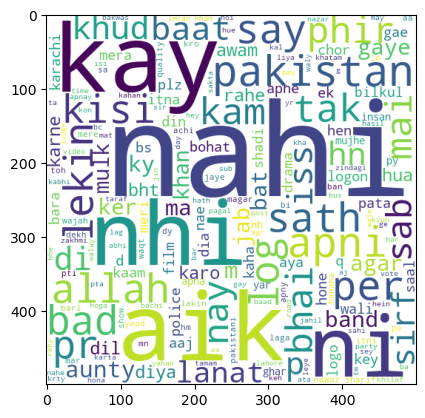

In [61]:
plt.imshow(nagetive)

In [62]:
df.head(5)

,review,sentiment,num_char,num_word,num_sent,transformed_comment
0,Aala taleem ke liye Cambridge gae to angrezi s...,1,115,21,1,aala taleem cambridge gae angrezi asal mahaul ...
1,Lekin is tarha ke kitne waqeaat honge jo manza...,1,151,26,1,lekin tarha kitne waqeaat honge nahi aae magar...
2,Question: Guzishta arse Deal Stain ne musalsal...,0,103,22,1,question guzishta arse deal stain musalsal kai...
3,Retire hone ka bawajud cricket se Javed Miand...,1,217,40,1,retire hone bawajud cricket javed miandad talu...
4,ab ham Nadeem key nam se jantey haien to keya ...,1,489,91,1,ham nadeem key nam jantey haien keya nadeem da...


In [63]:
positive_corpus = []
for msg in df[df['sentiment']==1]['transformed_comment'].tolist():
    for word in msg.split():
        positive_corpus.append(word)

In [64]:
len(positive_corpus)

62250

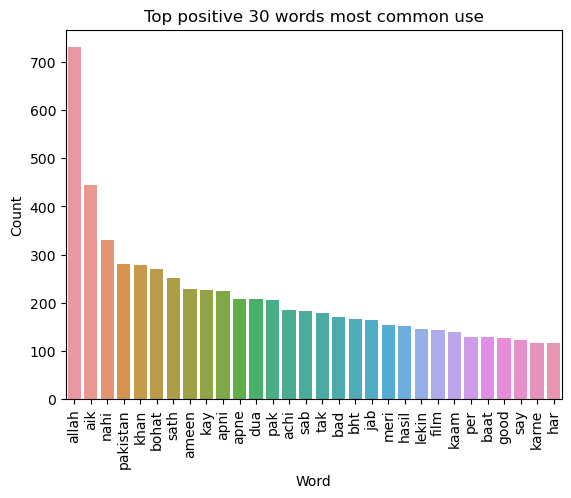

In [65]:
from collections import Counter

# Calculate the most common words and their counts
common_words = Counter(positive_corpus).most_common(30)

# Convert the results to a DataFrame for easier plotting
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Count'])

# Create the bar plot using seaborn
sns.barplot(x='Word', y='Count', data=common_words_df)

# Rotate x-axis labels for better readability
plt.xticks(rotation='vertical')
plt.title('Top positive 30 words most common use')

# Display the plot
plt.show()


In [66]:
nagetive_corpus= []
for msg in df[df['sentiment']==0]['transformed_comment'].tolist():
    for word in msg.split():
        nagetive_corpus.append(word)

In [67]:
len(nagetive_corpus)

53049

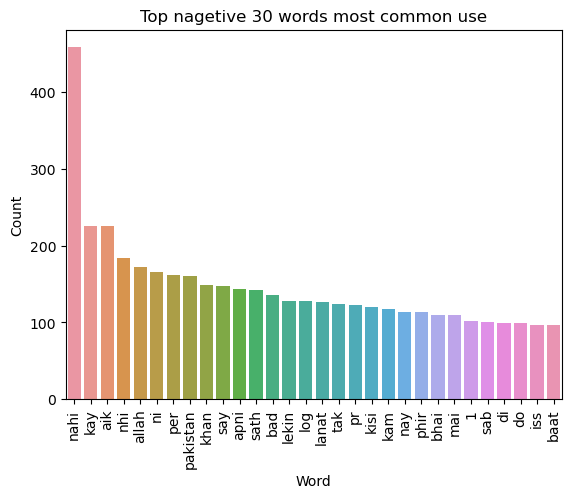

In [68]:
from collections import Counter

# Calculate the most common words and their counts
common_words = Counter(nagetive_corpus).most_common(30)

# Convert the results to a DataFrame for easier plotting
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Count'])

# Create the bar plot using seaborn
sns.barplot(x='Word', y='Count', data=common_words_df)

# Rotate x-axis labels for better readability
plt.xticks(rotation='vertical')
plt.title('Top nagetive 30 words most common use')

# Display the plot
plt.show()



In [69]:
df.head(5)


,review,sentiment,num_char,num_word,num_sent,transformed_comment
0,Aala taleem ke liye Cambridge gae to angrezi s...,1,115,21,1,aala taleem cambridge gae angrezi asal mahaul ...
1,Lekin is tarha ke kitne waqeaat honge jo manza...,1,151,26,1,lekin tarha kitne waqeaat honge nahi aae magar...
2,Question: Guzishta arse Deal Stain ne musalsal...,0,103,22,1,question guzishta arse deal stain musalsal kai...
3,Retire hone ka bawajud cricket se Javed Miand...,1,217,40,1,retire hone bawajud cricket javed miandad talu...
4,ab ham Nadeem key nam se jantey haien to keya ...,1,489,91,1,ham nadeem key nam jantey haien keya nadeem da...


# Model Building

In [70]:


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay



In [ ]:
# for model building first of all we convert text into vector
cv=CountVectorizer()
tfidf = TfidfVectorizer(max_features=5000)

In [71]:
x = cv.fit_transform(df['transformed_comment']).toarray()

In [72]:
x.shape

(11008, 24349)

In [73]:
y = df['sentiment'].values

In [74]:
y

array([1, 1, 0, ..., 0, 0, 0])

In [75]:
from sklearn.model_selection import train_test_split

In [105]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [107]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()




###  Multinomial Naive Bayes

In [175]:
mnb.fit(x_train, y_train)


MultinomialNB()

In [176]:
#Accuracy of the model on training and testing data
 
print("Training Accuracy :", mnb.score(x_train, y_train))
print("Testing Accuracy :", mnb.score(x_test, y_test))

Training Accuracy : 0.9224392459686578
Testing Accuracy : 0.7801998183469573


In [177]:
y_pred = mnb.predict(x_test)

In [178]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[688 334]
 [235 945]]


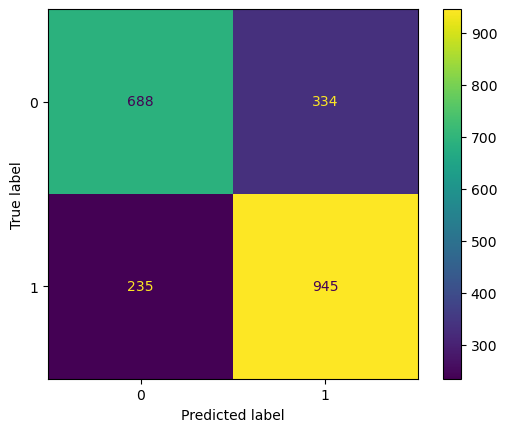

In [180]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=mnb.classes_)
cm_display.plot()
plt.show()

### Gaussian Naive Bayes

In [167]:
gnb.fit(x_train, y_train)


GaussianNB()

In [170]:
#Accuracy of the model on training and testing data
 
print("Training Accuracy :", gnb.score(x_train, y_train))
print("Testing Accuracy :", gnb.score(x_test, y_test))

Training Accuracy : 0.9532137179196003
Testing Accuracy : 0.7029972752043597


In [171]:
y_pred = bnb.predict(x_test)

In [172]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[688 334]
 [235 945]]


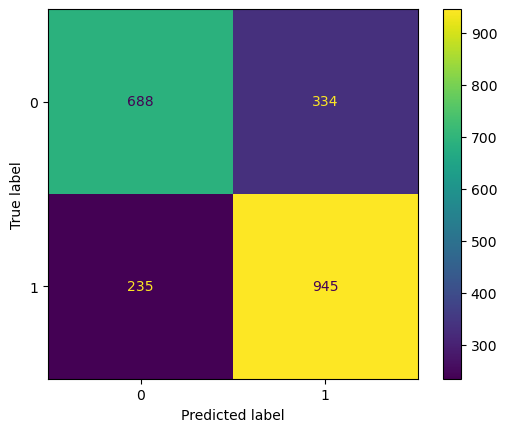

In [179]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gnb.classes_)
cm_display.plot()
plt.show()

### Bernoulli Naive Bayes 

In [139]:
bnb.fit(x_train, y_train)


BernoulliNB()

In [144]:
#Accuracy of the model on training and testing data
 
print("Training Accuracy :", bnb.score(x_train, y_train))
print("Testing Accuracy :", bnb.score(x_test, y_test))

Training Accuracy : 0.9248239836475131
Testing Accuracy : 0.7815622161671208


In [148]:
y_pred = bnb.predict(x_test)

In [150]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[688 334]
 [235 945]]


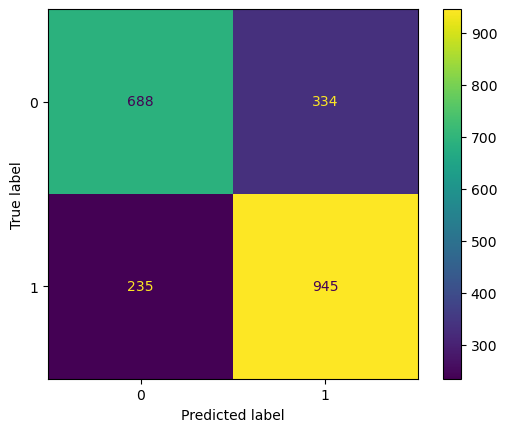

In [151]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=bnb.classes_)
cm_display.plot()
plt.show()

### Decision Tree Classifier

In [116]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [122]:
#Accuracy of the model on training and testing data
 
print("Training Accuracy :", model_dt.score(x_train, y_train))
print("Testing Accuracy :", model_dt.score(x_test, y_test))

Training Accuracy : 0.9992050874403816
Testing Accuracy : 0.6989100817438693


In [145]:
y_pred = model_dt.predict(x_test)

In [146]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[688 334]
 [235 945]]


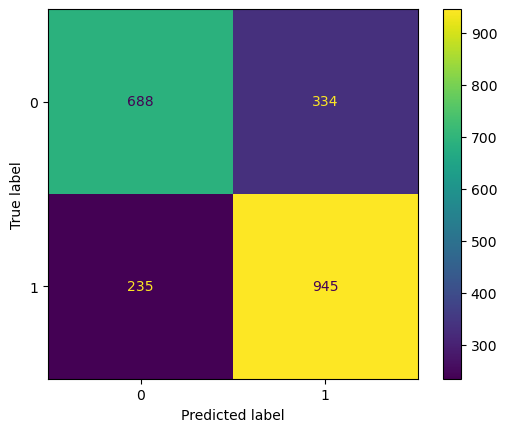

In [147]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_dt.classes_)
cm_display.plot()
plt.show()

### Random Forest

In [132]:
model_rf = RandomForestClassifier()

In [133]:
model_rf.fit(x_train, y_train)

RandomForestClassifier()

In [134]:
#Accuracy of the model on training and testing data
 
print("Training Accuracy :", model_rf.score(x_train, y_train))
print("Testing Accuracy :", model_rf.score(x_test, y_test))

Training Accuracy : 0.9992050874403816
Testing Accuracy : 0.7415985467756585


In [136]:
#Predicting on the test set
y_preds = model_rf.predict(x_test)

In [137]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)

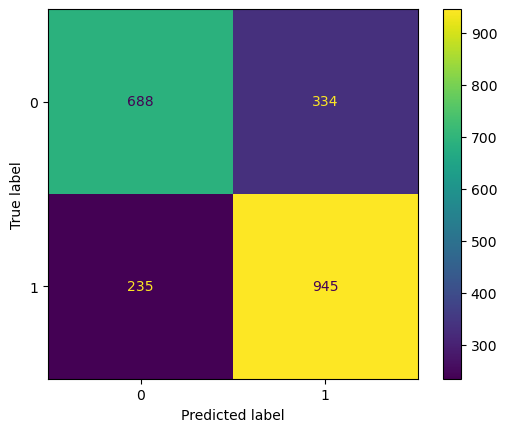

In [138]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rf.classes_)
cm_display.plot()
plt.show()

In [104]:
import pickle
pickle.dump(bnb,open('bnb.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))

In [185]:
def prediction(comment):
    preprocessed_comment =transform_text(comment)
    preprocessed_comment= remove_emojis(preprocessed_comment)
    comment_list = [preprocessed_comment]  # Wrap the preprocessed comment in a list
    comment_vector = cv.transform(comment_list)
    prediction = bnb.predict(comment_vector)[0]
    return prediction



prediction = prediction('In donon halkon khususan tharparkar ke logon mein bara josh o kharosh paya jata tha ke mustaqbil ka aik wazir e Azam un ke elaqe se intekhab lar raha hai jis ke nateje mein is elaqe ki qismat badal jaye gi')

In [186]:
if prediction == 1:
    print("positive comment")
else:
    print("negative comment")

positive comment


In [184]:
df['review'][20]

'In donon halkon khususan tharparkar ke logon mein bara josh o kharosh paya jata tha ke mustaqbil ka aik wazir e Azam un ke elaqe se intekhab lar raha hai jis ke nateje mein is elaqe ki qismat badal jaye gi'